## Antibiotic resistance analysis

In [2]:
import pandas as pd
total_reads_data = pd.read_csv("kraken2_log/Chennai_kraken2_log.csv")
sample_name = total_reads_data['Samples']
read_counts = total_reads_data['Total_no_of_read']

In [19]:
import os

# Specify the path to the 'rgi_bwt' directory
rgi_bwt_path = 'rgi_bwt'

for sample in sample_name:
    # Convert sample to string to ensure it's compatible with os.path.join
    sample_str = str(sample)
    
    # Construct the path to the subfolder for the current sample
    sample_folder_path = os.path.join(rgi_bwt_path, sample_str)
    
    # Find the gene mapping data table file within the subfolder
    gene_mapping_file = [file for file in os.listdir(sample_folder_path) if file.endswith('.gene_mapping_data.txt')]
    
    
    if len(gene_mapping_file) == 1:
        # Construct the full path to the gene mapping data table
        table_path = os.path.join(sample_folder_path, gene_mapping_file[0])
       
        print(f"Processing table: {table_path}")
        # Read the gene mapping data table
        
        gene_mapping_data = pd.read_table(table_path)
        
        # Assuming 'geneLength' is a column in the gene mapping data table
        gene_length = gene_mapping_data['Reference Length']
        
        # Assuming 'numReads' is a column in the gene mapping data table
        num_reads = gene_mapping_data['All Mapped Reads']
        
        # Convert read count to integer
        total_reads = int(read_counts[sample_name == sample].values)
        
        # Calculate RPKM using the formula
        rpkm = num_reads / (gene_length / 1000 * total_reads / 1000000)
        
        # Add the RPKM values as a new column in the gene mapping data table
        gene_mapping_data['RPKM'] = rpkm
        updated_table_path = os.path.join(sample_folder_path, f'{sample}_updated.gene_mapping_data_1.txt')
        
        gene_mapping_data.to_csv(updated_table_path, index=False)
        
        print(f"Updated table saved to: {updated_table_path}")


       

In [62]:
import os
import pandas as pd

# Specify the path to the 'rgi_bwt' directory
rgi_bwt_path = 'rgi_bwt'

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

for sample in sample_name:
    # Convert sample to string to ensure it's compatible with os.path.join
    sample_str = str(sample)
    
    # Construct the path to the subfolder for the current sample
    sample_folder_path = os.path.join(rgi_bwt_path, sample_str)
    
    # Find the gene mapping data table file within the subfolder
    gene_mapping_file = [file for file in os.listdir(sample_folder_path) if file.endswith('_updated.gene_mapping_data.txt')]
    
    if len(gene_mapping_file) == 1:
        # Construct the full path to the gene mapping data table
        table_path = os.path.join(sample_folder_path, gene_mapping_file[0])
       
        print(f"Processing table: {table_path}")
        
        try:
            # Read the gene mapping data table
            updated_gene_mapping_data = pd.read_csv(table_path)

            # Get the index of the 'Drug Class' column
            drug_class_index = -3  # 3rd from the last

            # Check if the index is valid
            if drug_class_index >= -len(updated_gene_mapping_data.columns):
                # Extract 'Drug Class' and 'RPKM' columns
                extracted_data = updated_gene_mapping_data.iloc[:, [drug_class_index, -1]]

                # Rename columns to match the expected names
                extracted_data.columns = ['Drug Class', 'RPKM']

                # Add the sample information
                extracted_data['Sample'] = sample

                # Append the data to the combined DataFrame
                combined_data = pd.concat([combined_data, extracted_data], ignore_index=True)
            else:
                print(f"Invalid index for 'Drug Class' in {table_path}")
        except Exception as e:
            print(f"Error processing table {table_path}: {e}")
    else:
        print(f"No or multiple gene mapping files found for sample {sample}")
        print(f"Contents of the folder: {os.listdir(sample_folder_path)}")

# Print the combined data to diagnose the issue
print("Combined Data:")
print(combined_data)

# Save the combined data to a CSV file
combined_data.to_csv('combined_data.csv', index=False)


Processing table: rgi_bwt\368257238\368257238_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368257968\368257968_updated.gene_mapping_data.txt


<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Processing table: rgi_bwt\368258054\368258054_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259600\368259600_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259989\368259989_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368273379\368273379_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281318\368281318_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281322\368281322_updated.gene_mapping_data.txt


<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Processing table: rgi_bwt\368281337\368281337_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281369\368281369_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281370\368281370_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281482\368281482_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281490\368281490_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281495\368281495_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281511\368281511_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281532\368281532_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368246110\368246110_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368253732\368253732_updated.gene_mapping_data.txt


<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Processing table: rgi_bwt\368258345\368258345_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258351\368258351_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258353\368258353_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258369\368258369_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258383\368258383_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258384\368258384_updated.gene_mapping_data.txt


<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

Processing table: rgi_bwt\368258393\368258393_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258417\368258417_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258423\368258423_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258424\368258424_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258431\368258431_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259698\368259698_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259701\368259701_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259706\368259706_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259707\368259707_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259710\368259710_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259717\368259717_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259718\368259718_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259737\368259737_updated.gene_mapping_data.txt
Processing t

<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-62-e1d167d450fd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

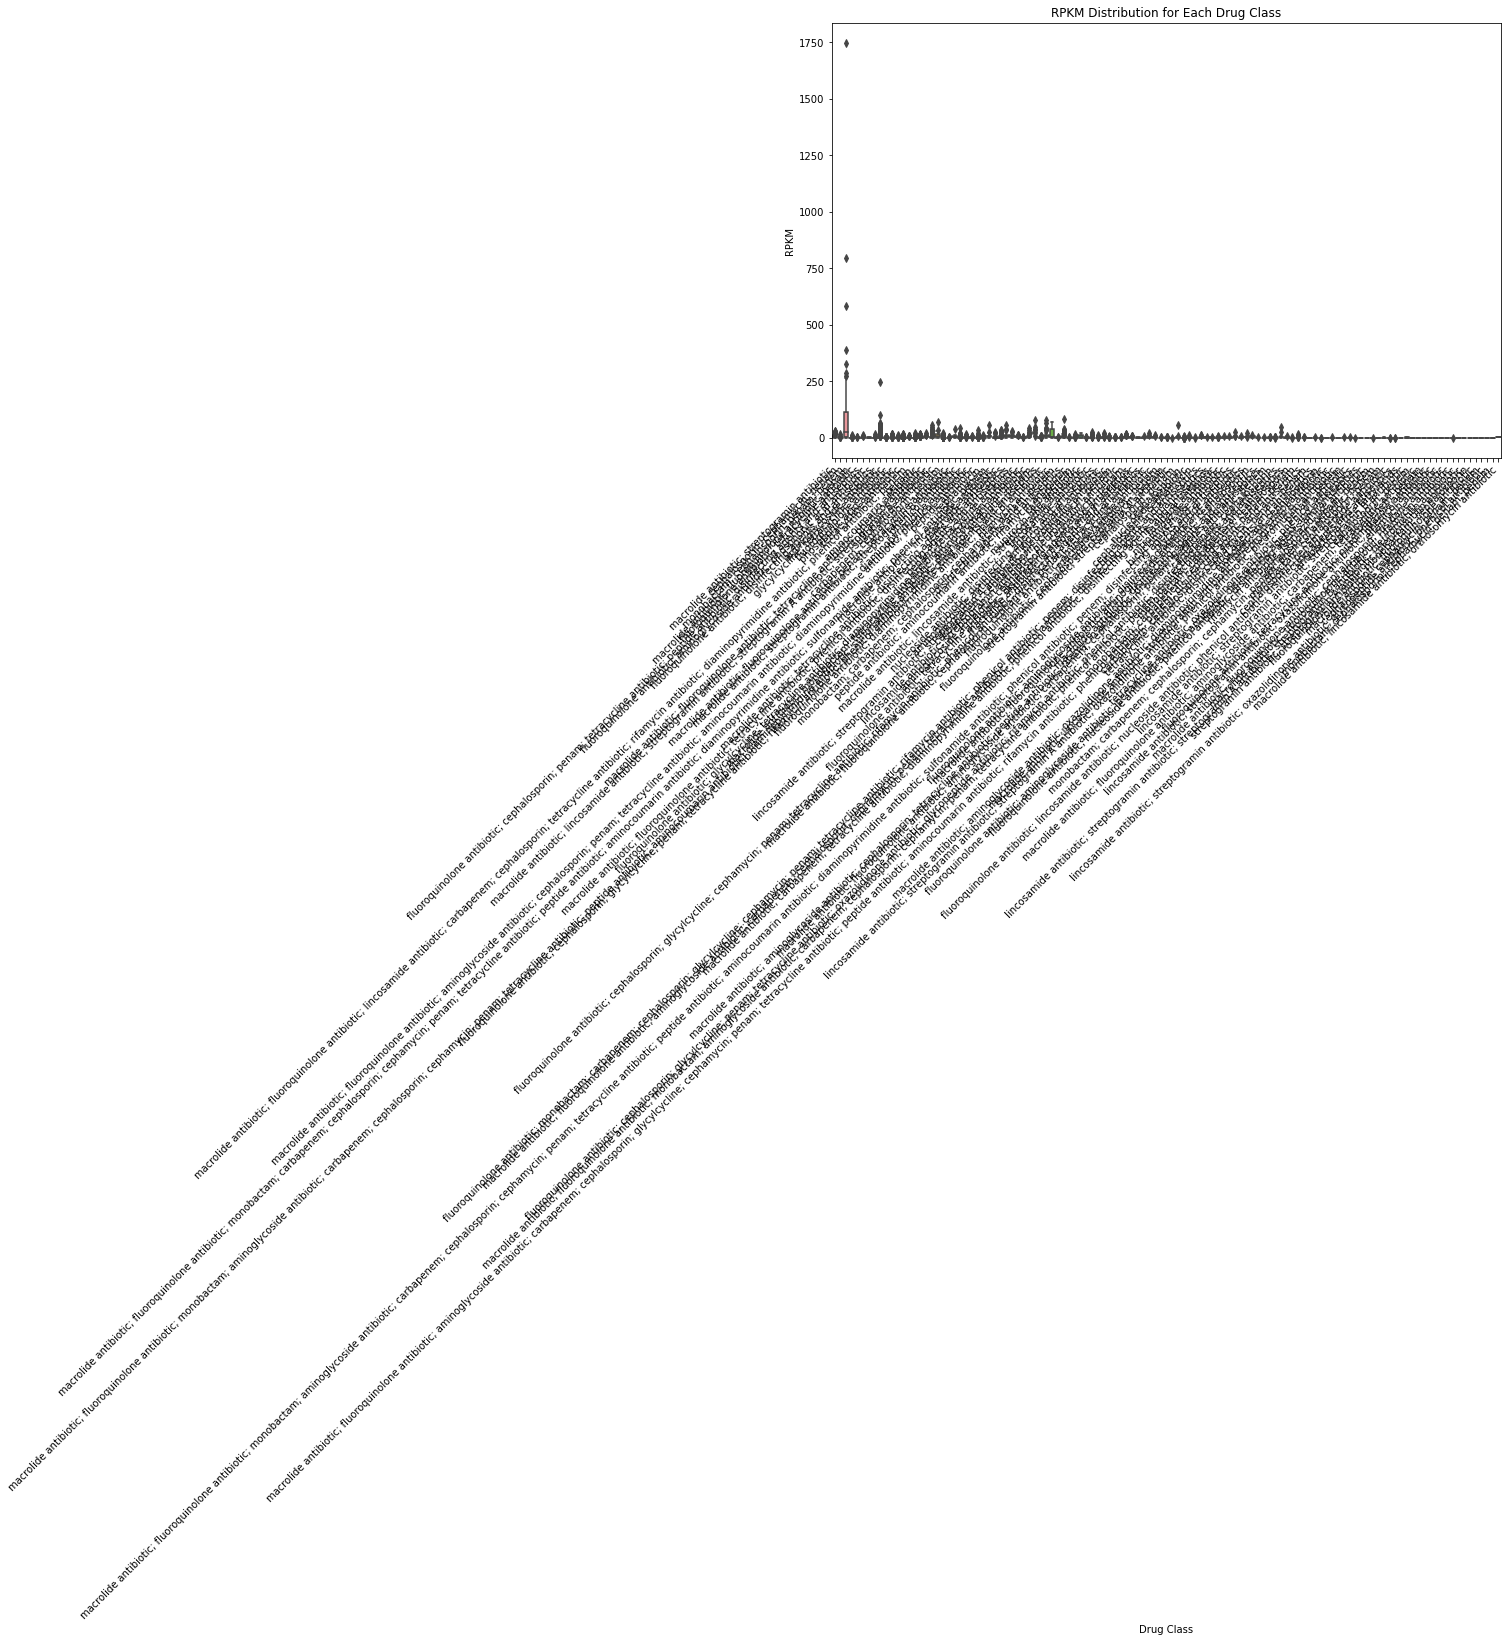

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('combined_data.csv')

# Create a box plot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Drug Class', y='RPKM', data=combined_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('RPKM Distribution for Each Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('RPKM')
plt.show()

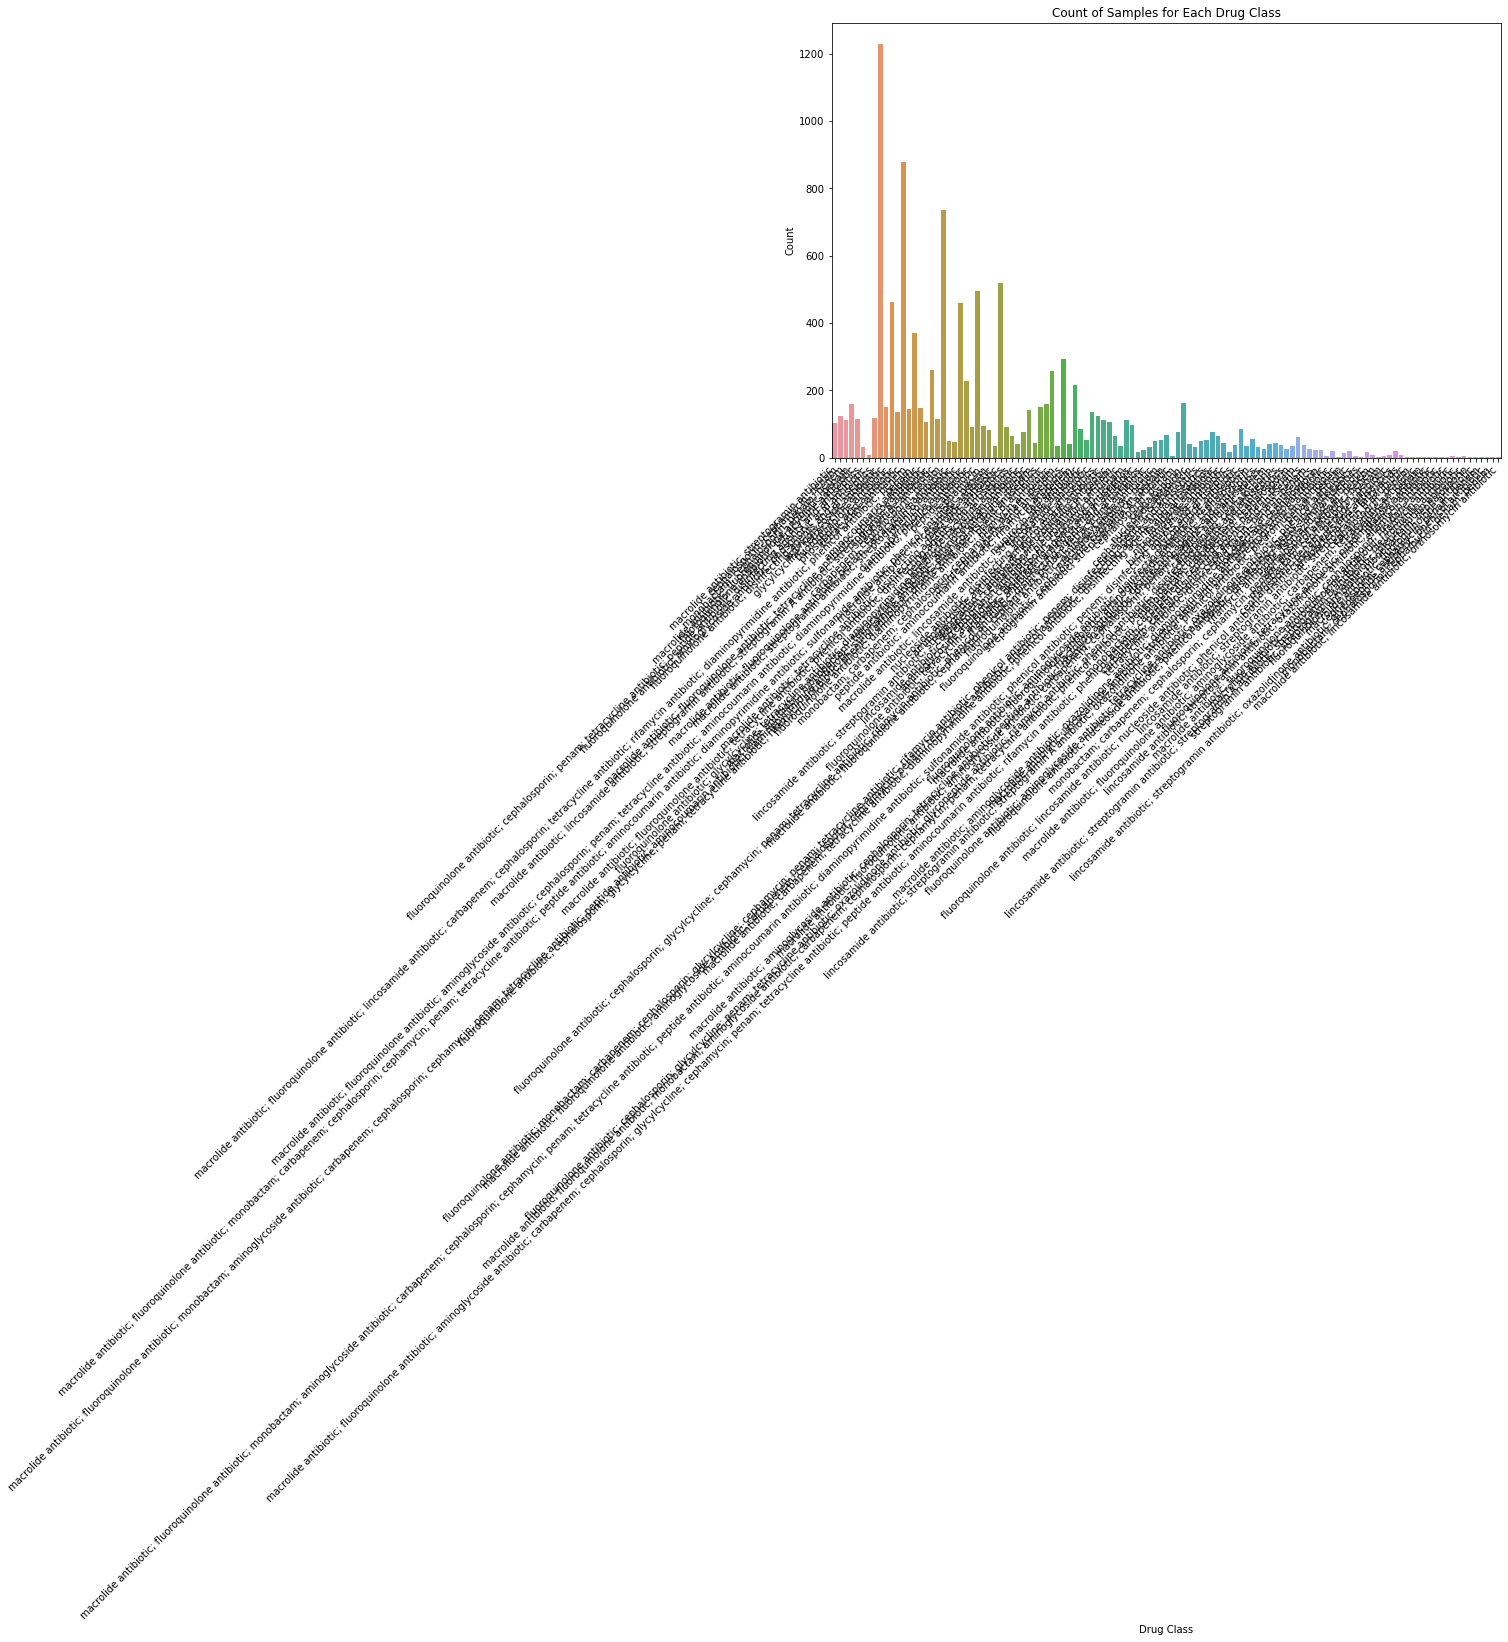

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('combined_data.csv')

# Create a count plot for Drug Class
plt.figure(figsize=(12, 8))
sns.countplot(x='Drug Class', data=combined_data)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Count of Samples for Each Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.show()


In [68]:
import pandas as pd

# Load the combined data
combined_data = pd.read_csv('combined_data.csv')

# Get the unique drug classes
unique_drug_classes = combined_data['Drug Class'].unique()

# Create a DataFrame with unique drug classes
unique_drug_classes_df = pd.DataFrame({'Drug Class': unique_drug_classes})

# Save the unique drug classes to a CSV file
unique_drug_classes_df.to_csv('unique_drug_classes.csv', index=False)

# Print the unique drug classes and the total count
print("Unique Drug Classes:", unique_drug_classes)
print("Number of Unique Drug Classes:", len(unique_drug_classes))


Unique Drug Classes: ['macrolide antibiotic; streptogramin antibiotic'
 'cephalosporin; cephamycin; penam'
 'monobactam; cephalosporin; penam; penem'
 'macrolide antibiotic; fluoroquinolone antibiotic; penam'
 'fluoroquinolone antibiotic; tetracycline antibiotic'
 'fluoroquinolone antibiotic; cephalosporin; penam; tetracycline antibiotic; peptide antibiotic; disinfecting agents and antiseptics'
 'fluoroquinolone antibiotic; aminoglycoside antibiotic; phosphonic acid antibiotic'
 'fluoroquinolone antibiotic; disinfecting agents and antiseptics'
 'aminoglycoside antibiotic' 'glycylcycline; tetracycline antibiotic'
 'fluoroquinolone antibiotic' 'phosphonic acid antibiotic'
 'tetracycline antibiotic'
 'macrolide antibiotic; fluoroquinolone antibiotic; lincosamide antibiotic; carbapenem; cephalosporin; tetracycline antibiotic; rifamycin antibiotic; diaminopyrimidine antibiotic; phenicol antibiotic; penem'
 'penam' 'aminocoumarin antibiotic'
 'macrolide antibiotic; fluoroquinolone antibiotic

In [9]:
import pandas as pd
unique_drug_classes_df = pd.read_csv("unique_drug_classes.csv")
combined_data = pd.read_csv("combined_data.csv")
combined_data

,Drug Class,RPKM,Sample
0,macrolide antibiotic; streptogramin antibiotic,9.207069,368257238
1,cephalosporin; cephamycin; penam,5.898279,368257238
2,monobactam; cephalosporin; penam; penem,68.395370,368257238
3,macrolide antibiotic; fluoroquinolone antibiot...,2.182022,368257238
4,fluoroquinolone antibiotic; tetracycline antib...,2.136735,368257238
...,...,...,...
11793,carbapenem; cephalosporin; cephamycin; penam,1.231053,368299282
11794,aminoglycoside antibiotic,0.829861,368299282
11795,lincosamide antibiotic,3.459346,368299282
11796,nucleoside antibiotic; disinfecting agents and...,0.674427,368299282


In [10]:
# Merge the two DataFrames on 'Drug Class'
merged_data = combined_data.merge(unique_drug_classes_df, on='Drug Class', how='left')

# Print the merged data
print("Merged Data:")
print(merged_data)


Merged Data:
                                              Drug Class       RPKM  \
0         macrolide antibiotic; streptogramin antibiotic   9.207069   
1                       cephalosporin; cephamycin; penam   5.898279   
2                monobactam; cephalosporin; penam; penem  68.395370   
3      macrolide antibiotic; fluoroquinolone antibiot...   2.182022   
4      fluoroquinolone antibiotic; tetracycline antib...   2.136735   
...                                                  ...        ...   
11793       carbapenem; cephalosporin; cephamycin; penam   1.231053   
11794                          aminoglycoside antibiotic   0.829861   
11795                             lincosamide antibiotic   3.459346   
11796  nucleoside antibiotic; disinfecting agents and...   0.674427   
11797                          aminoglycoside antibiotic   1.373564   

          Sample                      Group  
0      368257238     Multi-drug resistance   
1      368257238     Multi-drug resistance

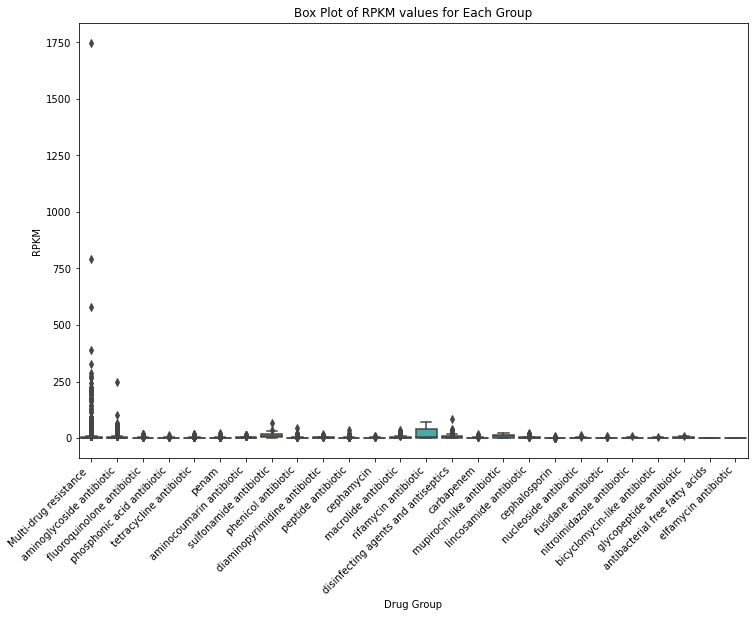

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
merged_data_nonzero = merged_data[merged_data['RPKM'] != 0]
# Create a box plot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='Group', y='RPKM', data= merged_data)
plt.title('Box Plot of RPKM values for Each Group')
plt.xlabel('Drug Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.show()


In [14]:
merged_data

,Drug Class,RPKM,Sample,Group
0,macrolide antibiotic; streptogramin antibiotic,9.207069,368257238,Multi-drug resistance
1,cephalosporin; cephamycin; penam,5.898279,368257238,Multi-drug resistance
2,monobactam; cephalosporin; penam; penem,68.395370,368257238,Multi-drug resistance
3,macrolide antibiotic; fluoroquinolone antibiot...,2.182022,368257238,Multi-drug resistance
4,fluoroquinolone antibiotic; tetracycline antib...,2.136735,368257238,Multi-drug resistance
...,...,...,...,...
11793,carbapenem; cephalosporin; cephamycin; penam,1.231053,368299282,Multi-drug resistance
11794,aminoglycoside antibiotic,0.829861,368299282,aminoglycoside antibiotic
11795,lincosamide antibiotic,3.459346,368299282,lincosamide antibiotic
11796,nucleoside antibiotic; disinfecting agents and...,0.674427,368299282,Multi-drug resistance


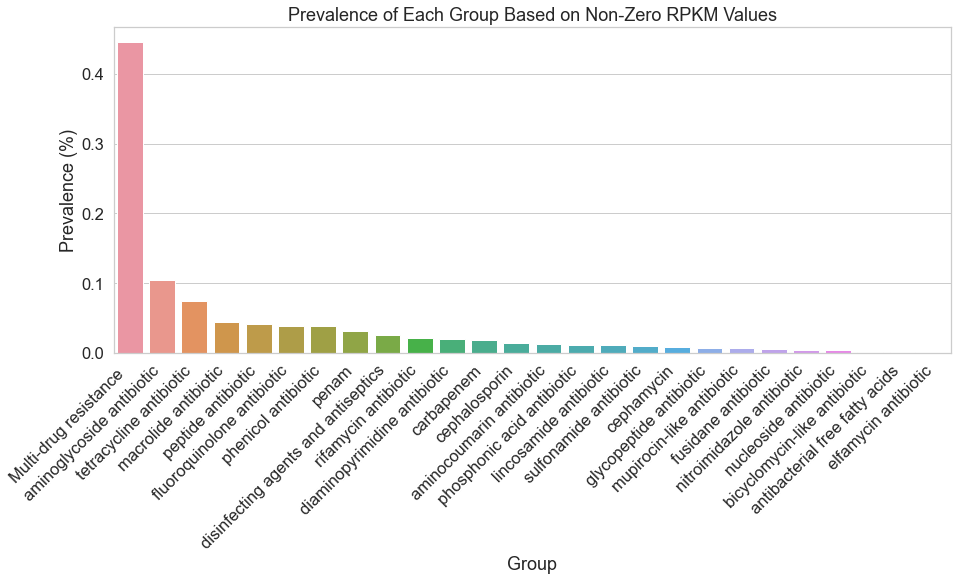

In [45]:
prevalence_data = merged_data.groupby('Group').size() / len(merged_data) 

prevalence_data_sorted = prevalence_data.sort_values(ascending=False)
sns.set(style="whitegrid", font_scale=1.5) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=prevalence_data_sorted.index, y=prevalence_data_sorted.values)
plt.title('Prevalence of Each Group Based on Non-Zero RPKM Values')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prevalence (%)')
plt.savefig('prevalence_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
order_list = prevalence_data.sort_values(ascending=False).index.tolist()
order_list 

['Multi-drug resistance ',
 'aminoglycoside antibiotic',
 'tetracycline antibiotic',
 'macrolide antibiotic',
 'peptide antibiotic',
 'fluoroquinolone antibiotic',
 'phenicol antibiotic',
 'penam',
 'disinfecting agents and antiseptics',
 'rifamycin antibiotic',
 'diaminopyrimidine antibiotic',
 'carbapenem',
 'cephalosporin',
 'aminocoumarin antibiotic',
 'phosphonic acid antibiotic',
 'lincosamide antibiotic',
 'sulfonamide antibiotic',
 'cephamycin',
 'glycopeptide antibiotic',
 'mupirocin-like antibiotic',
 'fusidane antibiotic',
 'nitroimidazole antibiotic',
 'nucleoside antibiotic',
 'bicyclomycin-like antibiotic',
 'antibacterial free fatty acids',
 'elfamycin antibiotic']

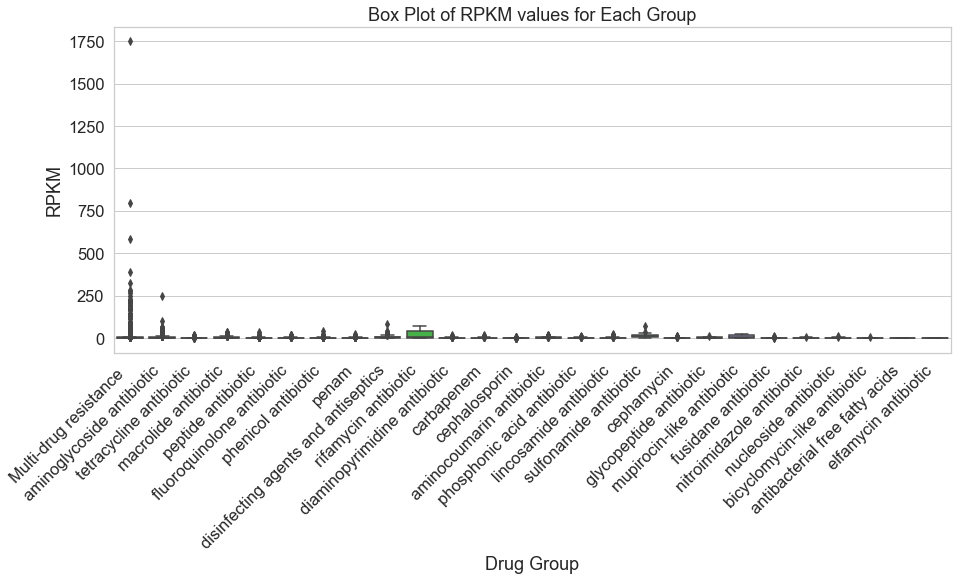

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
merged_data_nonzero = merged_data[merged_data['RPKM'] != 0]
# Create a box plot using Seaborn
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Group', y='RPKM', data= merged_data, order= order_list)
plt.title('Box Plot of RPKM values for Each Group')
plt.xlabel('Drug Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.savefig('rpkm_plot.png', dpi=300, bbox_inches='tight')
plt.show()


# Using each sample mean

In [1]:
merged_data.to_csv("merged_data.csv")

NameError: name 'merged_data' is not defined

In [8]:
import pandas as pd

data = pd.read_csv("merged_data.csv")

# Group by both "Sample" and "Group" and calculate the mean RPKM
result_df = data.groupby(['Sample', 'Group']).mean().reset_index()

print(result_df)


         Sample                         Group    Unnamed: 0       RPKM
0     368246110        Multi-drug resistance    3800.219048   1.844112
1     368246110      aminocoumarin antibiotic   3737.250000   2.981625
2     368246110     aminoglycoside antibiotic   3799.565217   4.413973
3     368246110  bicyclomycin-like antibiotic   3863.000000   0.924810
4     368246110                    carbapenem   3869.000000   0.498860
...         ...                           ...           ...        ...
1025  368299282           phenicol antibiotic  11629.600000   2.126233
1026  368299282    phosphonic acid antibiotic  11756.500000   0.494921
1027  368299282          rifamycin antibiotic  11694.666667  20.101774
1028  368299282        sulfonamide antibiotic  11607.000000  19.681121
1029  368299282       tetracycline antibiotic  11631.269231   0.857255

[1030 rows x 4 columns]


In [50]:
result_df.to_csv("rpkm_mean.csv") 

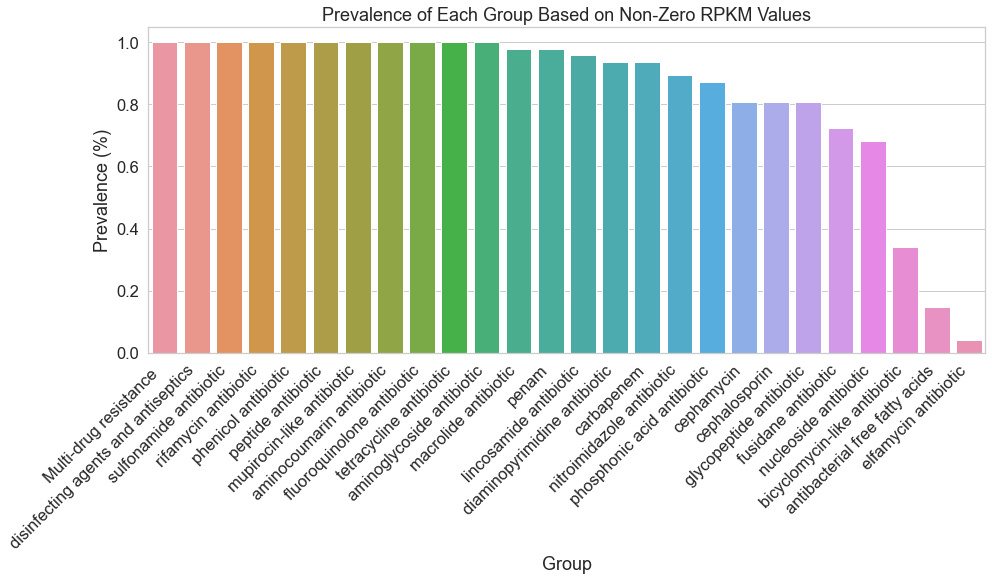

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
prevalence_data =result_df.groupby('Group').size() / 47

prevalence_data_sorted = prevalence_data.sort_values(ascending=False)
sns.set(style="whitegrid", font_scale=1.5) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=prevalence_data_sorted.index, y=prevalence_data_sorted.values)
plt.title('Prevalence of Each Group Based on Non-Zero RPKM Values')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prevalence (%)')
plt.savefig('prevalence_plot_mean.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
prevalence_data =result_df.groupby('Group').size()
prevalence_data 

Group
Multi-drug resistance                  47
aminocoumarin antibiotic               47
aminoglycoside antibiotic              47
antibacterial free fatty acids          7
bicyclomycin-like antibiotic           16
carbapenem                             44
cephalosporin                          38
cephamycin                             38
diaminopyrimidine antibiotic           44
disinfecting agents and antiseptics    47
elfamycin antibiotic                    2
fluoroquinolone antibiotic             47
fusidane antibiotic                    34
glycopeptide antibiotic                38
lincosamide antibiotic                 45
macrolide antibiotic                   46
mupirocin-like antibiotic              47
nitroimidazole antibiotic              42
nucleoside antibiotic                  32
penam                                  46
peptide antibiotic                     47
phenicol antibiotic                    47
phosphonic acid antibiotic             41
rifamycin antibiotic        

In [11]:
order_list = prevalence_data.sort_values(ascending=False).index.tolist()
order_list 

['Multi-drug resistance ',
 'disinfecting agents and antiseptics',
 'sulfonamide antibiotic',
 'rifamycin antibiotic',
 'phenicol antibiotic',
 'peptide antibiotic',
 'mupirocin-like antibiotic',
 'aminocoumarin antibiotic',
 'fluoroquinolone antibiotic',
 'tetracycline antibiotic',
 'aminoglycoside antibiotic',
 'macrolide antibiotic',
 'penam',
 'lincosamide antibiotic',
 'diaminopyrimidine antibiotic',
 'carbapenem',
 'nitroimidazole antibiotic',
 'phosphonic acid antibiotic',
 'cephamycin',
 'cephalosporin',
 'glycopeptide antibiotic',
 'fusidane antibiotic',
 'nucleoside antibiotic',
 'bicyclomycin-like antibiotic',
 'antibacterial free fatty acids',
 'elfamycin antibiotic']

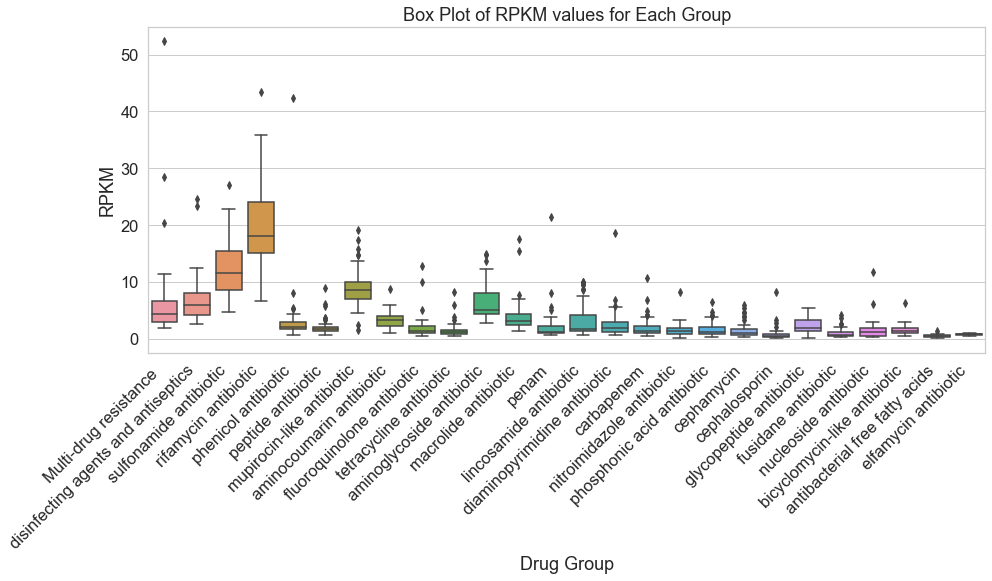

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot using Seaborn
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(15, 6))
sns.boxplot(x='Group', y='RPKM', data= result_df, order= order_list)
plt.title('Box Plot of RPKM values for Each Group')
plt.xlabel('Drug Group')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.savefig('rpkm_plot_mean_drug_class.png', dpi=300, bbox_inches='tight')
plt.show()


# resistance mechanism 

In [3]:
import os
import pandas as pd

# Specify the path to the 'rgi_bwt' directory
rgi_bwt_path = 'rgi_bwt'

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

for sample in sample_name:
    # Convert sample to string to ensure it's compatible with os.path.join
    sample_str = str(sample)
    
    # Construct the path to the subfolder for the current sample
    sample_folder_path = os.path.join(rgi_bwt_path, sample_str)
    
    # Find the gene mapping data table file within the subfolder
    gene_mapping_file = [file for file in os.listdir(sample_folder_path) if file.endswith('_updated.gene_mapping_data.txt')]
    
    if len(gene_mapping_file) == 1:
        # Construct the full path to the gene mapping data table
        table_path = os.path.join(sample_folder_path, gene_mapping_file[0])
       
        print(f"Processing table: {table_path}")
        
        try:
            # Read the gene mapping data table
            updated_gene_mapping_data = pd.read_csv(table_path)

            # Get the index of the 'Resistance Mechanism' column
            resistance_class_index = -2  # 2rd from the last

            # Check if the index is valid
            if resistance_class_index >= -len(updated_gene_mapping_data.columns):
                # Extract 'Resistance Mechanism' and 'RPKM' columns
                extracted_data = updated_gene_mapping_data.iloc[:, [resistance_class_index, -1]]

                # Rename columns to match the expected names
                extracted_data.columns = ['resistance_mechanism', 'RPKM']

                # Add the sample information
                extracted_data['Sample'] = sample

                # Append the data to the combined DataFrame
                combined_data = pd.concat([combined_data, extracted_data], ignore_index=True)
            else:
                print(f"Invalid index for 'Drug Class' in {table_path}")
        except Exception as e:
            print(f"Error processing table {table_path}: {e}")
    else:
        print(f"No or multiple gene mapping files found for sample {sample}")
        print(f"Contents of the folder: {os.listdir(sample_folder_path)}")

# Print the combined data to diagnose the issue
print("Combined Data:")
print(combined_data)




Processing table: rgi_bwt\368257238\368257238_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368257968\368257968_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258054\368258054_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259600\368259600_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259989\368259989_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368273379\368273379_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281318\368281318_updated.gene_mapping_data.txt


<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Processing table: rgi_bwt\368281322\368281322_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281337\368281337_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281369\368281369_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281370\368281370_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281482\368281482_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281490\368281490_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281495\368281495_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281511\368281511_updated.gene_mapping_data.txt


<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Processing table: rgi_bwt\368281532\368281532_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368246110\368246110_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368253732\368253732_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258345\368258345_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258351\368258351_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258353\368258353_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258369\368258369_updated.gene_mapping_data.txt


<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Processing table: rgi_bwt\368258383\368258383_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258384\368258384_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258393\368258393_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258417\368258417_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258423\368258423_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258424\368258424_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258431\368258431_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259698\368259698_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259701\368259701_updated.gene_mapping_data.txt

<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde


Processing table: rgi_bwt\368259706\368259706_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259707\368259707_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259710\368259710_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259717\368259717_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259718\368259718_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259737\368259737_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259760\368259760_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259764\368259764_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259770\368259770_updated.gene_mapping_data.txt

<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde


Processing table: rgi_bwt\368259776\368259776_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368260393\368260393_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368297838\368297838_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368297861\368297861_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368297885\368297885_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368299257\368299257_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368299282\368299282_updated.gene_mapping_data.txt
Combined Data:
               resistance_mechanism       RPKM     Sample
0      antibiotic target protection   9.207069  368257238
1           antibiotic inactivation   5.898279  368257238
2           antibiotic inactivation  68.395370  368257238
3                 antibiotic efflux   2.182022  368257238
4                 antibiotic efflux   2.136735  368257238
...                             ...        ...        ...
11793       antibiotic inactivation   1.231053

<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample
<ipython-input-3-332507403a93>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [4]:
# Save the combined data to a CSV file
combined_data.to_csv('combined_data_resistance_mechanism.csv', index=False)

In [13]:
import pandas as pd

data = pd.read_csv('combined_data_resistance_mechanism.csv')

# Group by both "Sample" and "Group" and calculate the mean RPKM
result_df = data.groupby(['Sample', 'resistance_mechanism']).mean().reset_index()

print(result_df)


        Sample                               resistance_mechanism       RPKM
0    368246110                                  antibiotic efflux   1.513755
1    368246110  antibiotic efflux; reduced permeability to ant...   0.873512
2    368246110                            antibiotic inactivation   2.610349
3    368246110                       antibiotic target alteration   1.028854
4    368246110  antibiotic target alteration; antibiotic targe...  32.160779
..         ...                                                ...        ...
389  368299282    antibiotic target alteration; antibiotic efflux   1.854682
390  368299282  antibiotic target alteration; antibiotic targe...  53.229880
391  368299282                       antibiotic target protection   1.843773
392  368299282                      antibiotic target replacement   5.315304
393  368299282                 reduced permeability to antibiotic   1.372174

[394 rows x 3 columns]


In [15]:
prevalence_data =result_df.groupby('resistance_mechanism').size()
prevalence_data 

resistance_mechanism
antibiotic efflux                                              47
antibiotic efflux; reduced permeability to antibiotic          34
antibiotic inactivation                                        47
antibiotic target alteration                                   47
antibiotic target alteration; antibiotic efflux                36
antibiotic target alteration; antibiotic target replacement    47
antibiotic target protection                                   47
antibiotic target replacement                                  47
reduced permeability to antibiotic                             42
dtype: int64

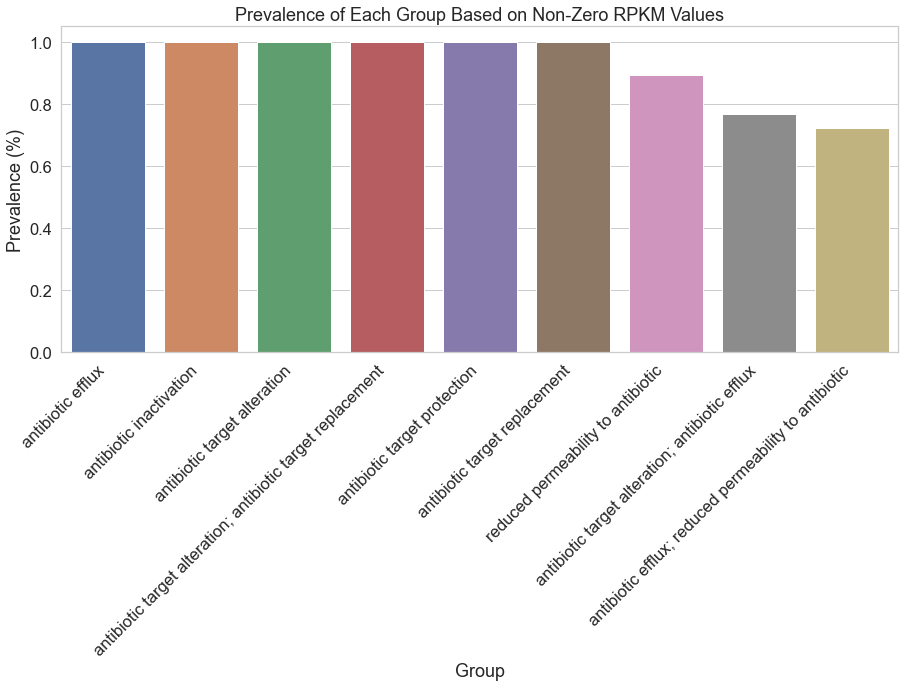

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
prevalence_data =result_df.groupby('resistance_mechanism').size() / 47

prevalence_data_sorted = prevalence_data.sort_values(ascending=False)
sns.set(style="whitegrid", font_scale=1.5) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=prevalence_data_sorted.index, y=prevalence_data_sorted.values)
plt.title('Prevalence of Each Group Based on Non-Zero RPKM Values')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Prevalence (%)')
plt.savefig('prevalence_plot_mean_resistnace_mechanism.png', dpi=300, bbox_inches='tight')
plt.show()

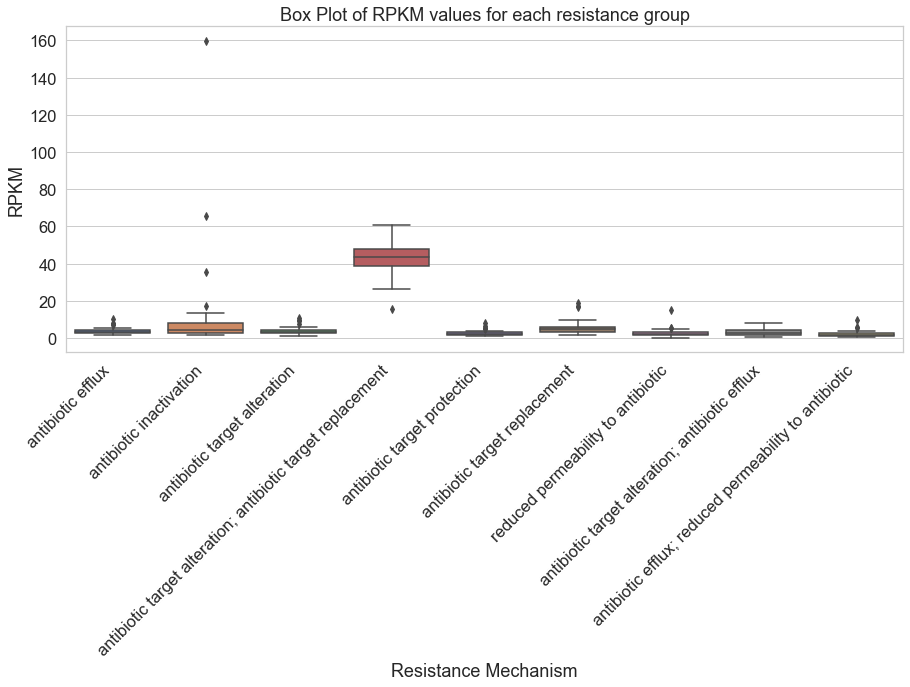

In [19]:
order_list = prevalence_data.sort_values(ascending=False).index.tolist()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a box plot using Seaborn
sns.set(style="whitegrid", font_scale=1.5)
plt.figure(figsize=(15, 6))
sns.boxplot(x='resistance_mechanism', y='RPKM', data= result_df, order= order_list)
plt.title('Box Plot of RPKM values for each resistance group')
plt.xlabel('Resistance Mechanism')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RPKM')
plt.savefig('rpkm_plot_mean_resistance.png', dpi=300, bbox_inches='tight')
plt.show()


## count of drug classes

In [1]:
import os
import pandas as pd

data = pd.read_csv('merged_data.csv')


In [6]:
count_data =data.groupby('Group').size()
count_data_sorted = count_data.sort_values(ascending=False)
count_data_sorted.values

array([5254, 1230,  879,  519,  494,  461,  459,  369,  294,  258,  229,
        215,  161,  147,  137,  136,  116,   95,   85,   84,   64,   44,
         42,   16,    8,    2], dtype=int64)

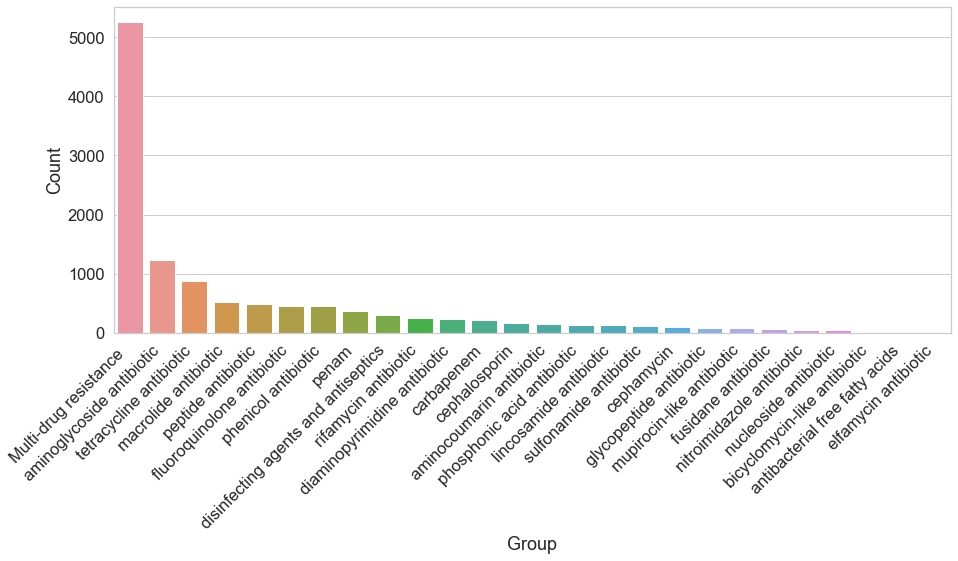

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
count_data_sorted = count_data.sort_values(ascending=False)
sns.set(style="whitegrid", font_scale=1.5) 
# Plot the prevalence values
plt.figure(figsize=(15, 6))
sns.barplot(x=count_data_sorted.index, y=count_data_sorted.values)
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Count')
plt.savefig('Count_plot_dru_class.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
import os
import pandas as pd
import pandas as pd
total_reads_data = pd.read_csv("kraken2_log/Chennai_kraken2_log.csv")
sample_name = total_reads_data['Samples']
# Specify the path to the 'rgi_bwt' directory
rgi_bwt_path = 'rgi_bwt'

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

for sample in sample_name:
    # Convert sample to string to ensure it's compatible with os.path.join
    sample_str = str(sample)
    
    # Construct the path to the subfolder for the current sample
    sample_folder_path = os.path.join(rgi_bwt_path, sample_str)
    
    # Find the gene mapping data table file within the subfolder
    gene_mapping_file = [file for file in os.listdir(sample_folder_path) if file.endswith('_updated.gene_mapping_data.txt')]
    
    if len(gene_mapping_file) == 1:
        # Construct the full path to the gene mapping data table
        table_path = os.path.join(sample_folder_path, gene_mapping_file[0])
       
        print(f"Processing table: {table_path}")
        
        try:
            # Read the gene mapping data table
            updated_gene_mapping_data = pd.read_csv(table_path)

            # Get the index of the 'Drug Class' column
            drug_class_index = -3  # 3rd from the last

            # Check if the index is valid
            if drug_class_index >= -len(updated_gene_mapping_data.columns):
                # Extract 'Drug Class' and 'RPKM' columns
                extracted_data = updated_gene_mapping_data.iloc[:, [-4, drug_class_index, -1]]

                # Rename columns to match the expected names
                extracted_data.columns = ['AMR Gene Family','Drug Class', 'RPKM']

                # Add the sample information
                extracted_data['Sample'] = sample

                # Append the data to the combined DataFrame
                combined_data = pd.concat([combined_data, extracted_data], ignore_index=True)
            else:
                print(f"Invalid index for 'Drug Class' in {table_path}")
        except Exception as e:
            print(f"Error processing table {table_path}: {e}")
    else:
        print(f"No or multiple gene mapping files found for sample {sample}")
        print(f"Contents of the folder: {os.listdir(sample_folder_path)}")

# Print the combined data to diagnose the issue
print("Combined Data:")
print(combined_data)



Processing table: rgi_bwt\368257238\368257238_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368257968\368257968_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258054\368258054_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259600\368259600_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368259989\368259989_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368273379\368273379_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281318\368281318_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281322\368281322_updated.gene_mapping_data.txt


<ipython-input-10-1ecc50be28f0>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_data['Sample'] = sample


Processing table: rgi_bwt\368281337\368281337_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281369\368281369_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281370\368281370_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281482\368281482_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281490\368281490_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281495\368281495_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281511\368281511_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368281532\368281532_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368246110\368246110_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368253732\368253732_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258345\368258345_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258351\368258351_updated.gene_mapping_data.txt
Processing table: rgi_bwt\368258353\368258353_updated.gene_mapping_data.txt
Processing t

In [11]:
# Save the combined data to a CSV file
combined_data.to_csv('combined_data_with_gene_family.csv', index=False)


In [4]:
import os
import pandas as pd
import pandas as pd
df  = pd.read_csv("merged_data.csv")
merged_data_arg_family =   df[['Sample', 'Group', 'AMR Gene Family']]

In [5]:
merged_data_arg_family

,Sample,Group,AMR Gene Family
0,368257238,Multi-drug resistance,msr-type ABC-F protein
1,368257238,Multi-drug resistance,MOX beta-lactamase
2,368257238,Multi-drug resistance,TEM beta-lactamase
3,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
4,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
...,...,...,...
11793,368299282,Multi-drug resistance,PJM beta-lactamase
11794,368299282,aminoglycoside antibiotic,ANT(9)
11795,368299282,lincosamide antibiotic,lincosamide nucleotidyltransferase (LNU)
11796,368299282,Multi-drug resistance,major facilitator superfamily (MFS) antibiotic...


In [14]:


import pandas as pd

# Load the DataFrame from the CSV file
df = pd.read_csv("merged_data.csv")

# Select the required columns
merged_data_arg_family = df[['Sample', 'Group', 'AMR Gene Family']]

# Group by 'Sample' and aggregate 'AMR Gene Family' and 'Group' columns to get unique values for each sample
unique_amr_per_sample = merged_data_arg_family.groupby('Sample').agg({'AMR Gene Family': 'unique', 'Group': 'first'}).reset_index()

# Rename the columns
unique_amr_per_sample.columns = ['Sample', 'Unique AMR Gene Family', 'Group']

# Display the new DataFrame
unique_amr_per_sample

,Sample,Unique AMR Gene Family,Group
0,368246110,"[Erm 23S ribosomal RNA methyltransferase, linc...",Multi-drug resistance
1,368253732,"[lincosamide nucleotidyltransferase (LNU), msr...",lincosamide antibiotic
2,368257238,"[msr-type ABC-F protein, MOX beta-lactamase, T...",Multi-drug resistance
3,368257968,"[lincosamide nucleotidyltransferase (LNU), msr...",lincosamide antibiotic
4,368258054,"[msr-type ABC-F protein, TEM beta-lactamase, r...",Multi-drug resistance
5,368258345,"[OXA beta-lactamase, Target protecting FusB-ty...",Multi-drug resistance
6,368258351,"[CblA beta-lactamase, Target protecting FusB-t...",cephalosporin
7,368258353,"[lincosamide nucleotidyltransferase (LNU), msr...",lincosamide antibiotic
8,368258369,"[lincosamide nucleotidyltransferase (LNU), msr...",lincosamide antibiotic
9,368258383,"[lincosamide nucleotidyltransferase (LNU), msr...",lincosamide antibiotic


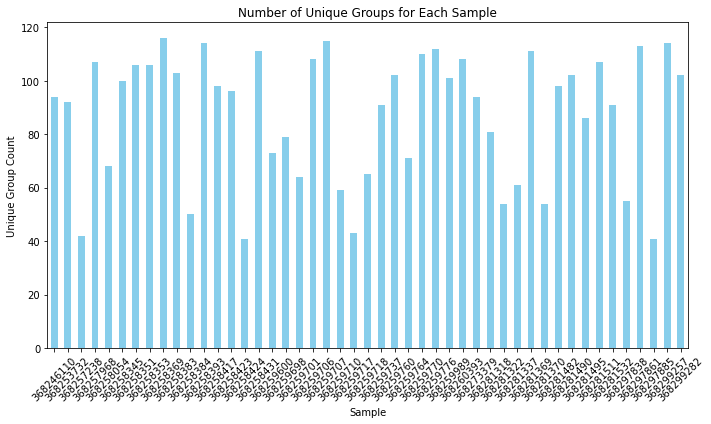

Total Unique Group Count in All Samples: 4109


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv("merged_data.csv")

# Select the required columns
merged_data_arg_family = df[['Sample', 'Group', 'AMR Gene Family']]

# Create an empty dictionary to store the count of unique groups for each sample
unique_group_count_per_sample = {}

# Iterate over each unique sample
for sample, sample_data in merged_data_arg_family.groupby('Sample'):
    # Get unique AMR gene families for the current sample
    unique_amr_gene_families = sample_data['AMR Gene Family'].unique()
    # Count the number of unique groups corresponding to unique AMR gene families
    unique_groups_count = sample_data.groupby('AMR Gene Family')['Group'].nunique().sum()
    # Store the count of unique groups for the current sample
    unique_group_count_per_sample[sample] = {'Unique Group Count': unique_groups_count,
                                             'Unique Groups': sample_data.groupby('AMR Gene Family')['Group'].unique()}

# Convert the dictionary to a DataFrame
unique_group_count_df = pd.DataFrame.from_dict(unique_group_count_per_sample, orient='index')

# Summing up the unique group counts for all samples
total_unique_group_count = unique_group_count_df['Unique Group Count'].sum()

# Plotting
plt.figure(figsize=(10, 6))
unique_group_count_df['Unique Group Count'].plot(kind='bar', color='skyblue')
plt.title('Number of Unique Groups for Each Sample')
plt.xlabel('Sample')
plt.ylabel('Unique Group Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print total unique group count
print("Total Unique Group Count in All Samples:", total_unique_group_count)


<Figure size 1080x720 with 0 Axes>

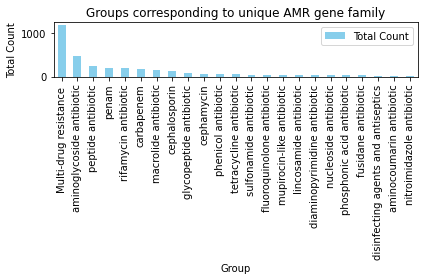

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv("merged_data.csv")

# Select the required columns
merged_data_arg_family = df[['Sample', 'Group', 'AMR Gene Family']]

# Create an empty dictionary to store the count of each group across samples
group_counts = {}

# Iterate over each sample
for _, sample_data in merged_data_arg_family.groupby('Sample'):
    # Remove duplicates in AMR gene family for the current sample
    unique_amr_gene_families = sample_data.drop_duplicates(subset=['AMR Gene Family'])
    # Count the occurrences of each group
    for group in unique_amr_gene_families['Group']:
        group_counts[group] = group_counts.get(group, 0) + 1

# Convert the dictionary to a DataFrame
group_counts_df = pd.DataFrame(list(group_counts.items()), columns=['Group', 'Total Count'])

# Sort the DataFrame by 'Total Count' column in descending order
group_counts_df = group_counts_df.sort_values(by='Total Count', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
group_counts_df.plot(kind='bar', x='Group', y='Total Count', color='skyblue')
plt.title('Groups corresponding to unique AMR gene family')
plt.xlabel('Group')
plt.ylabel('Total Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Counts_groupd_AMR_gene_family.png', dpi=600)
plt.show()


In [36]:
df 

,Unnamed: 0,Drug Class,RPKM,Sample,Group,AMR Gene Family
0,0,macrolide antibiotic; streptogramin antibiotic,9.207069,368257238,Multi-drug resistance,msr-type ABC-F protein
1,1,cephalosporin; cephamycin; penam,5.898279,368257238,Multi-drug resistance,MOX beta-lactamase
2,2,monobactam; cephalosporin; penam; penem,68.395370,368257238,Multi-drug resistance,TEM beta-lactamase
3,3,macrolide antibiotic; fluoroquinolone antibiot...,2.182022,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
4,4,fluoroquinolone antibiotic; tetracycline antib...,2.136735,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
...,...,...,...,...,...,...
11793,11793,carbapenem; cephalosporin; cephamycin; penam,1.231053,368299282,Multi-drug resistance,PJM beta-lactamase
11794,11794,aminoglycoside antibiotic,0.829861,368299282,aminoglycoside antibiotic,ANT(9)
11795,11795,lincosamide antibiotic,3.459346,368299282,lincosamide antibiotic,lincosamide nucleotidyltransferase (LNU)
11796,11796,nucleoside antibiotic; disinfecting agents and...,0.674427,368299282,Multi-drug resistance,major facilitator superfamily (MFS) antibiotic...


# plot RPKM for gene class corresponding to groups 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv("merged_data.csv")
df

,Unnamed: 0,Drug Class,RPKM,Sample,Group,AMR Gene Family
0,0,macrolide antibiotic; streptogramin antibiotic,9.207069,368257238,Multi-drug resistance,msr-type ABC-F protein
1,1,cephalosporin; cephamycin; penam,5.898279,368257238,Multi-drug resistance,MOX beta-lactamase
2,2,monobactam; cephalosporin; penam; penem,68.395370,368257238,Multi-drug resistance,TEM beta-lactamase
3,3,macrolide antibiotic; fluoroquinolone antibiot...,2.182022,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
4,4,fluoroquinolone antibiotic; tetracycline antib...,2.136735,368257238,Multi-drug resistance,resistance-nodulation-cell division (RND) anti...
...,...,...,...,...,...,...
11793,11793,carbapenem; cephalosporin; cephamycin; penam,1.231053,368299282,Multi-drug resistance,PJM beta-lactamase
11794,11794,aminoglycoside antibiotic,0.829861,368299282,aminoglycoside antibiotic,ANT(9)
11795,11795,lincosamide antibiotic,3.459346,368299282,lincosamide antibiotic,lincosamide nucleotidyltransferase (LNU)
11796,11796,nucleoside antibiotic; disinfecting agents and...,0.674427,368299282,Multi-drug resistance,major facilitator superfamily (MFS) antibiotic...


<ipython-input-80-8f1057195ab5>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 1440x576 with 0 Axes>

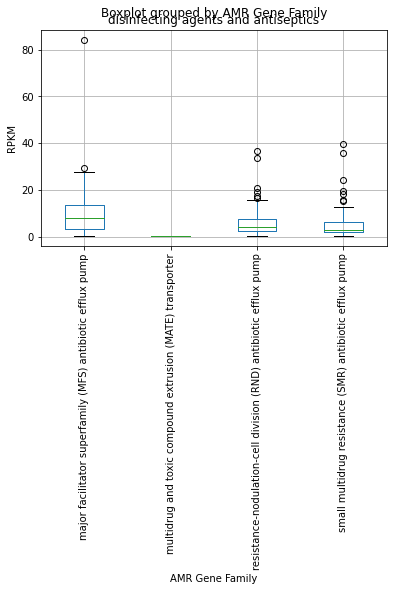

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df = pd.read_csv("merged_data.csv")

# Filter rows where Group is equal to 'peptide antibiotic'
peptide_antibiotic_data = df[df['Group'] == 'disinfecting agents and antiseptics']

# Select the required columns
merged_data_rpkm = peptide_antibiotic_data[['AMR Gene Family', 'RPKM']]


plt.figure(figsize=(20, 8))
merged_data_rpkm.boxplot(by='AMR Gene Family', column='RPKM', rot=90)
plt.xlabel('AMR Gene Family')
plt.ylabel('RPKM')
plt.title('disinfecting agents and antiseptics')
plt.tight_layout()
plt.savefig('disinfecting_agents_and_antiseptics_rpkm.png', dpi=600 )
plt.show()
